In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix

## Input

In [2]:
# read in data
X = pd.read_csv("training_data.csv")
X

,playerX,playerY,playerID
0,6852.0,-10771.0,67927.0
1,-7202.0,8601.0,67883.0
2,6068.0,8480.0,67884.0
3,3094.0,9183.0,67887.0
4,-1272.0,-7308.0,67921.0
...,...,...,...
315,-1047.0,-12031.0,68012.0
316,-359.0,10109.0,67906.0
317,4518.0,6228.0,67906.0
318,2620.0,11668.0,78845.0


In [3]:
y = pd.read_csv("labels.csv").astype("int")
y

,class
0,3
1,14
2,4
3,5
4,3
...,...
315,8
316,14
317,13
318,11


## Data cleaning/transformation

In [4]:
# move all input to one side of the court
X["playerY"] = np.abs(X["playerY"]) * -1
X

,playerX,playerY,playerID
0,6852.0,-10771.0,67927.0
1,-7202.0,-8601.0,67883.0
2,6068.0,-8480.0,67884.0
3,3094.0,-9183.0,67887.0
4,-1272.0,-7308.0,67921.0
...,...,...,...
315,-1047.0,-12031.0,68012.0
316,-359.0,-10109.0,67906.0
317,4518.0,-6228.0,67906.0
318,2620.0,-11668.0,78845.0


In [5]:
# one hot encode playerID
for pId in X.playerID.unique():
    X[pId] = 0

for i, r in X.iterrows():
    X.at[i, r["playerID"]] = 1

X = X.drop(columns=["playerID"])
X

,playerX,playerY,67927.0,67883.0,67884.0,67887.0,67921.0,78848.0,67885.0,67897.0,...,67368.0,67365.0,67895.0,67918.0,67369.0,75482.0,67347.0,75481.0,77725.0,77728.0
0,6852.0,-10771.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-7202.0,-8601.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6068.0,-8480.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3094.0,-9183.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1272.0,-7308.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,-1047.0,-12031.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
316,-359.0,-10109.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
317,4518.0,-6228.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
318,2620.0,-11668.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Fit and Evaluate Model

In [6]:
# note: due to the rushed hackathon schedule, we have not had time to train/val/test split and optimize hyperparameters

In [7]:
model = MLPClassifier(hidden_layer_sizes=[50 for i in range(10)])
model.fit(X, y)

/home/zaned/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[50, 50, 50, 50, 50, 50, 50, 50, 50, 50],
              learning_rate='constant', learning_rate_init=0.001, max_fun=15000,
              max_iter=200, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5, random_state=None,
              shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
              verbose=False, warm_start=False)

In [8]:
model.score(X, y)

0.2625

## Create Visualizations

In [9]:
for c in X.columns:
    if "player" not in str(c):
        print(c, X[c].sum())

67927.0 9
67883.0 5
67884.0 9
67887.0 16
67921.0 6
78848.0 7
67885.0 9
67897.0 10
78845.0 12
67906.0 19
78852.0 5
78846.0 8
67881.0 6
67348.0 2
68001.0 5
68012.0 13
68011.0 2
67349.0 10
67346.0 12
67339.0 14
67351.0 6
67337.0 5
68018.0 1
77727.0 10
67344.0 3
68002.0 3
77726.0 4
79832.0 12
67342.0 3
78377.0 1
67886.0 2
78370.0 1
67903.0 5
67922.0 5
67361.0 4
67910.0 6
67367.0 11
67363.0 6
77930.0 3
77928.0 2
77929.0 5
67368.0 9
67365.0 8
67895.0 1
67918.0 3
67369.0 7
75482.0 4
67347.0 6
75481.0 2
77725.0 1
77728.0 2


Confusion matrix, without normalization
[[ 1  0  7  0  2  0  0  1  0  0  1  1  1  0  0]
 [ 0  0  7  0  0  0  0  2  0  0  0  1  2  0  0]
 [ 0  0 31  1  3  0  0 14  0  0  0  1  5  0  0]
 [ 0  0  5  0  2  0  0  4  0  0  1  2  0  1  0]
 [ 0  0  8  1  3  0  0  5  0  0  0  1  1  0  0]
 [ 0  0  3  0  1  0  0  0  0  0  2  3  3  0  0]
 [ 0  0  2  0  2  0  0  5  0  0  0  1  0  0  0]
 [ 0  0 10  1  0  0  0 22  0  0  0  2  4  2  0]
 [ 0  0  1  1  0  0  0  3  1  0  0  0  1  2  0]
 [ 0  0  3  0  1  0  0  2  0  0  0  0  2  0  0]
 [ 0  0  6  0  2  0  0  3  0  0  4  0  4  1  0]
 [ 0  0 10  0  2  0  0  7  0  0  1  3  3  2  0]
 [ 0  0 10  0  2  0  0  9  0  0  1  4 12  0  0]
 [ 0  0 12  0  0  0  0  2  0  0  0  4  3  7  0]
 [ 0  0  5  0  1  0  0  3  0  0  0  1  1  0  0]]
Normalized confusion matrix
[[0.07142857 0.         0.5        0.         0.14285714 0.
  0.         0.07142857 0.         0.         0.07142857 0.07142857
  0.07142857 0.         0.        ]
 [0.         0.         0.58333333 0.         0

<Figure size 648x432 with 0 Axes>

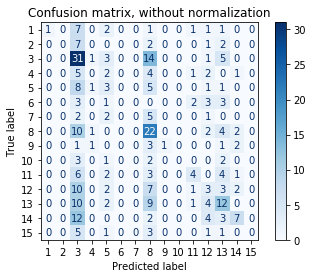

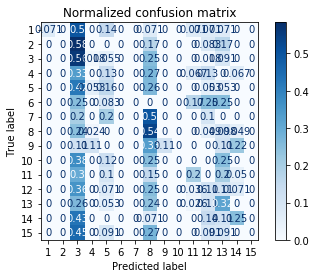

In [10]:
plt.figure(figsize=(9, 6))
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X, y,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)